# 1. Context and data upload

Data comes from [sg.openfoodfacts.org](https://sg.openfoodfacts.org/).

I tailored it as I only selected data from Singapore (main website is [openfoodfacts.org](https://world.openfoodfacts.org/)), but there is too much data to download and then use.

First I downloaded the CSV file (2.2Mo).
- File is now on my computer, ready to be uploaded,
- Cloud storage may be considered, but not at this point for me (paid option).

__Next step is to upload the CSV file in here.__

In [ ]:
# Upload the file on Colab (less than 1 minute)
from google.colab import files

uploaded = files.upload()

Saving openfoodfacts_export.csv to openfoodfacts_export (1).csv


In [ ]:
# IDEA: append the data from Malaysia for a bigger dataset?

# IDEA 2: also append data from Thailand/Indonesia?
# -> check if product_name_(lang) is not impacted

In [1]:
# First start by importing the packages used

# Work on data
import numpy as np
import pandas as pd
# Dataframe display
from tabulate import tabulate
# Plot missing values
import missingno as msno
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

According to online documentation:
- file is delimited using tabulation
- file encoding is UTF-8

In [2]:
# Read the file and create the dataset:
#init_data = pd.read_csv('openfoodfacts_export.csv', sep='\t')

# Check if difference with encoding?
init_data = pd.read_csv('openfoodfacts_export.csv', sep='\t', encoding='utf-8')

<ipython-input-2-f01b1671cb83>:5: DtypeWarning: Columns (1,3,4,5,6,7,9,10,11,13,14,15,16,18,19,20,22,23,24,26,27,28,29,30,31,32,33,34,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,67,80,81,86,87,88,89,91,92,93,94,95,96,97,98,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,150,166,172,174,176,178,180,182,184,186,188,190,192,200,204,206,208,210,216,218,222,224,226,228,236,240,250,252,256,260,278,280,282,284,290,292,294,296,314,318,319,320,321,322,323,325,326,327,337,343,344,345,347,348,351,352,353,354,355,356) have mixed types. Specify dtype option on import or set low_memory=False.
  init_data = pd.read_csv('openfoodfacts_export.csv', sep='\t', encoding='utf-8')


# 2. Overview of the data and pre-selection based on language

In [3]:
# Let's have a look at the shape first:
print("This dataset contains {} rows and {} columns".format(
    init_data.shape[0], init_data.shape[1]))

This dataset contains 2951 rows and 358 columns


In [4]:
# Overview of what information it contains.
# print(tabulate()) is only a way to display the information.
print(tabulate(init_data.head(5), headers='keys', tablefmt='github'))

|    |          code |   producer_version_id | lc   |   product_name_ar | product_name_bg   |   product_name_cs |   product_name_da | product_name_de              | product_name_en       |   product_name_es |   product_name_et |   product_name_fi | product_name_fr                      |   product_name_hi |   product_name_hr |   product_name_id | product_name_it   |   product_name_ja |   product_name_ko |   product_name_lt |   product_name_lv |   product_name_ms |   product_name_nb |   product_name_nl |   product_name_pl | product_name_pt   |   product_name_ro |   product_name_ru |   product_name_sk |   product_name_sr |   product_name_sv |   product_name_ta |   product_name_th |   product_name_tr |   product_name_uk |   product_name_zh | abbreviated_product_name_fr   |   generic_name_ar |   generic_name_bg |   generic_name_cs |   generic_name_da |   generic_name_de |   generic_name_en |   generic_name_es |   generic_name_et |   generic_name_fi | generic_name_fr                         

In [5]:
# I will now go through the different columns and, based on the language,
# remove the ones that are too empty.
# Start by initializing an empty list:
removed_columns = []

## 2.1. Selection of the 'product_name_[...]'

In [6]:
# Each product is named in different languages, I'll check their completion.
# Use of RegEx: https://www.w3schools.com/python/python_regex.asp
prod_name_lang_df = init_data.filter(regex=('^product_name_'))
print(tabulate(prod_name_lang_df.head(5), headers='keys', tablefmt='github'))

|    |   product_name_ar | product_name_bg   |   product_name_cs |   product_name_da | product_name_de              | product_name_en       |   product_name_es |   product_name_et |   product_name_fi | product_name_fr                      |   product_name_hi |   product_name_hr |   product_name_id | product_name_it   |   product_name_ja |   product_name_ko |   product_name_lt |   product_name_lv |   product_name_ms |   product_name_nb |   product_name_nl |   product_name_pl | product_name_pt   |   product_name_ro |   product_name_ru |   product_name_sk |   product_name_sr |   product_name_sv |   product_name_ta |   product_name_th |   product_name_tr |   product_name_uk |   product_name_zh |
|----|-------------------|-------------------|-------------------|-------------------|------------------------------|-----------------------|-------------------|-------------------|-------------------|--------------------------------------|-------------------|-------------------|-------------------

In [7]:
# I also save these columns in a list:
prod_name_lang_list = init_data.filter(
    regex=('^product_name_')).columns.to_list()

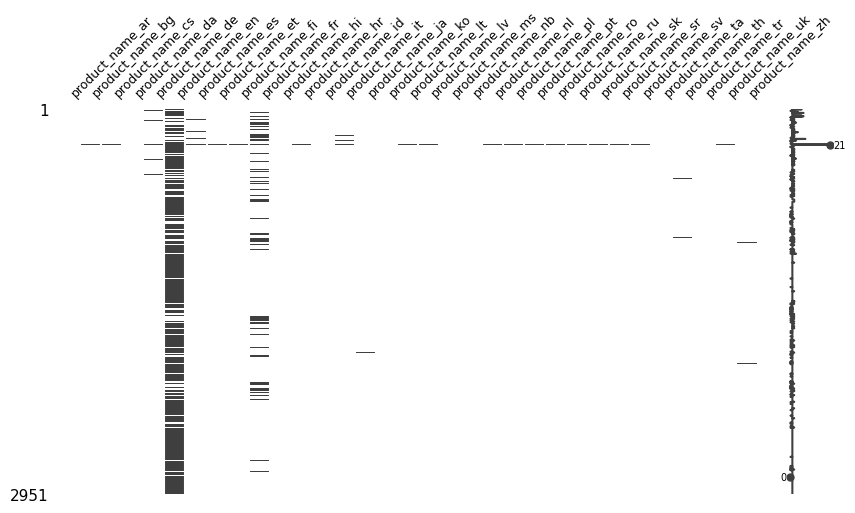

In [8]:
_ = msno.matrix(df=prod_name_lang_df, figsize=(10,5), fontsize=9)

In [9]:
# Since the product names are mostly available in English (also in French,
# but in a lesser extent), I only keep the '_en' variable:
prod_name_lang_list.remove('product_name_en')

In [10]:
# I add the other columns in the removal list:
removed_columns.extend(prod_name_lang_list)

## 2.2. Selection of the 'abbreviated_product_name_[...]'

In [11]:
# There is only one column at that time, but that may change:
abv_prod_name_lang_df = init_data.filter(regex=('^abbreviated_product_name_'))
print(tabulate(abv_prod_name_lang_df.head(5), headers='keys',
               tablefmt='github'))

|    | abbreviated_product_name_fr   |
|----|-------------------------------|
|  0 | nan                           |
|  1 | nan                           |
|  2 | Barilla fusilli 500g          |
|  3 | nan                           |
|  4 | nan                           |


In [12]:
# I also save this column (for now?) in a list:
abv_prod_name_lang_list = init_data.filter(
    regex=('^abbreviated_product_name_')).columns.to_list()

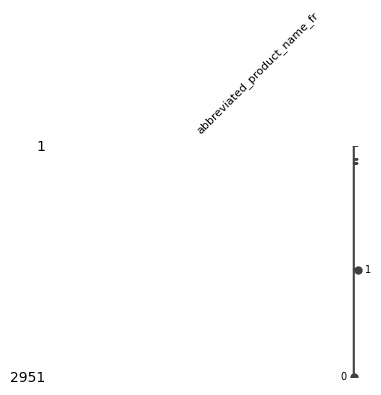

In [13]:
_ = msno.matrix(df=abv_prod_name_lang_df, figsize=(4,3), fontsize=8)

In [14]:
# This does not seem to be useful, so I add the column in the removal list.
removed_columns.extend(abv_prod_name_lang_list)

## 2.3. Selection of the 'generic_name_[...]'

In [15]:
# Each product is named in different languages, I'll check their completion:
gen_name_lang_df = init_data.filter(regex=('^generic_name_'))
print(tabulate(gen_name_lang_df.head(5), headers='keys', tablefmt='github'))

|    |   generic_name_ar |   generic_name_bg |   generic_name_cs |   generic_name_da |   generic_name_de |   generic_name_en |   generic_name_es |   generic_name_et |   generic_name_fi | generic_name_fr                          |   generic_name_hr |   generic_name_hu |   generic_name_it |   generic_name_lt |   generic_name_lv |   generic_name_nb |   generic_name_nl |   generic_name_pl | generic_name_pt   |   generic_name_ro |   generic_name_sk |   generic_name_sr |   generic_name_sv |   generic_name_th |
|----|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|------------------------------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-

In [16]:
# I also save these columns in a list:
gen_name_lang_list = init_data.filter(
    regex=('^generic_name_')).columns.to_list()

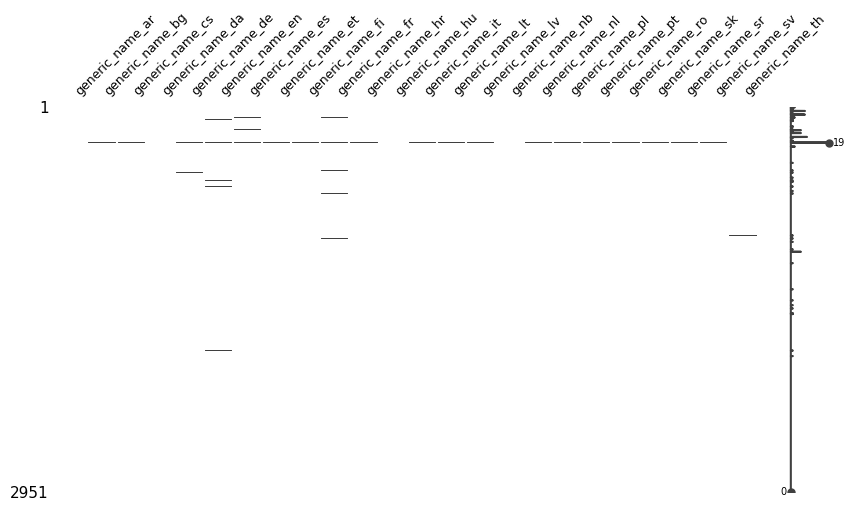

In [17]:
_ = msno.matrix(df=gen_name_lang_df, figsize=(10,5), fontsize=9)

In [18]:
# This does not seem to be useful, so I add the columns in the removal list:
removed_columns.extend(gen_name_lang_list)

## 2.4. Selection of the 'origin_[...]'

In [19]:
# There are only two columns at that time, but that may change:
origin_lang_df = init_data.filter(regex=('^origin_'))
print(tabulate(origin_lang_df.head(5), headers='keys', tablefmt='github'))

|    |   origin_en |   origin_fr |
|----|-------------|-------------|
|  0 |         nan |         nan |
|  1 |         nan |         nan |
|  2 |         nan |         nan |
|  3 |         nan |         nan |
|  4 |         nan |         nan |


In [20]:
# I also save these columns in a list:
origin_lang_list = init_data.filter(regex=('^origin_')).columns.to_list()

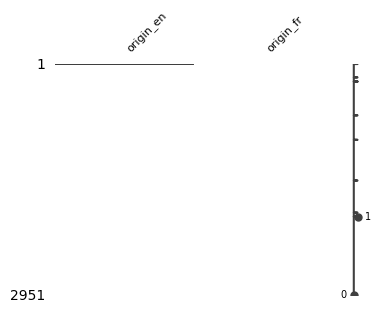

In [21]:
_ = msno.matrix(df=origin_lang_df, figsize=(4,3), fontsize=8)

In [22]:
# This does not seem to be useful, so I add the columns in the removal list:
removed_columns.extend(origin_lang_list)

## 2.5. Selection of the 'ingredients_text_[...]'

In [23]:
# Ingredients are listed in different languages, I'll check their completion:
ingred_txt_lang_df = init_data.filter(regex=('^ingredients_text_'))
print(tabulate(ingred_txt_lang_df.head(5), headers='keys', tablefmt='github'))

|    | ingredients_text_bg           |   ingredients_text_cs |   ingredients_text_da | ingredients_text_de                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                | ingredients_text_en                                                                                                                                                                                                                                                                                                                                         

In [24]:
# I also save these columns in a list:
ingred_txt_lang_list = init_data.filter(
    regex=('^ingredients_text_')).columns.to_list()

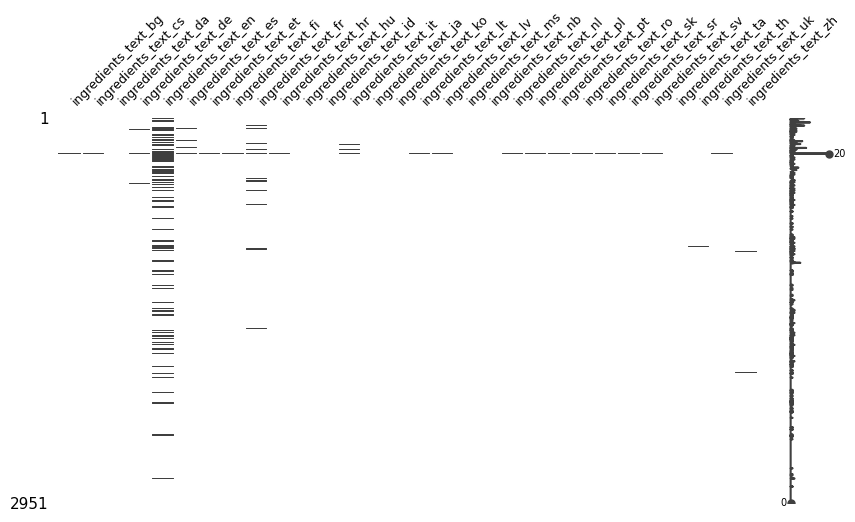

In [25]:
_ = msno.matrix(df=ingred_txt_lang_df, figsize=(10,5), fontsize=9)

In [26]:
# Since the ingredients are mostly available in English (also in French,
# but in a lesser extent), I only keep the '_en' variable:
ingred_txt_lang_list.remove('ingredients_text_en')

In [27]:
# I add the other columns in the removal list:
removed_columns.extend(ingred_txt_lang_list)

# 3. Data preparation (cleaning and completion)

In [28]:
# Let's start by removing the columns from the previous section
# init_data.columns.tolist() -> converts the columns into a list.
# Then using list comprehension to compute the difference of the two lists
# while maintaining the original order.
cleaning_df = init_data[
    [col for col in init_data.columns.tolist() if col not in removed_columns]]

In [29]:
# Let's have a look at the shape now:
print("The dataset now contains {} rows and {} columns".format(
    cleaning_df.shape[0], cleaning_df.shape[1]))

The dataset now contains 2951 rows and 270 columns


In [30]:
# Overview of what information it contains.
print(tabulate(cleaning_df.head(5), headers='keys', tablefmt='github'))

|    |          code |   producer_version_id | lc   | product_name_en       | quantity   | serving_size   | packaging                               | packaging_tags                                                 | brands                                                | brands_tags                                           |   brand_owner | categories                                                                                                                     | categories_tags                                                                                                                                     | labels                               | labels_tags                              | countries                                                                                                                               | countries_tags                                                                                                                                                

The main idea here is:
- determine which are the most determining variables for the Nutri-Score,
- knowing the value of some of these variables for a given product, is it possible to predict its Nutri-Score?

According to its [definition](https://en.wikipedia.org/wiki/Nutri-Score), the Nutri-Score is calculated as __total N score - total P score = Nutritional score__:
- Product ingredients negatively (__N__) affecting the Nutri-Score:
  - Energy density (kcal/100g, kcal/100ml for beverages),
  - Simple sugars (g/100g, g/100ml for beverages),
  - Saturated fats (g/100g, % for cooking fats),
  - Salt (mg/100g),
- Product ingredients positively (__P__) affecting the Nutri-Score:
  - Fruit and vegetables (%),
  - Fibre (g/100g),
  - Protein (g/100g).

These are the columns I keep at minima.

In [ ]:
# IDEA: Use the Eco-Score and compare both
# https://en.wikipedia.org/wiki/Eco-score

In [31]:
# Each product is named in different languages, I'll check their completion.
avail_scores = cleaning_df.filter(regex=('score'))
print(tabulate(avail_scores.head(5), headers='keys', tablefmt='github'))

|    |   nutriscore_score_producer |   nutriscore_grade_producer | off:nutriscore_grade   |   off:nutriscore_score | off:ecoscore_grade   |   off:ecoscore_score |   off:ecoscore_data.missing_key_data |   off:ecoscore_data.agribalyse.code |   off:ecoscore_data.adjustments.origins_of_ingredients.value |   off:ecoscore_data.adjustments.packaging.value |   off:ecoscore_data.adjustments.packaging.non_recyclable_and_non_biodegradable_materials |   off:ecoscore_data.adjustments.production_system.value |   off:ecoscore_data.adjustments.threatened_species.value |
|----|-----------------------------|-----------------------------|------------------------|------------------------|----------------------|----------------------|--------------------------------------|-------------------------------------|--------------------------------------------------------------|-------------------------------------------------|---------------------------------------------------------------------------------------

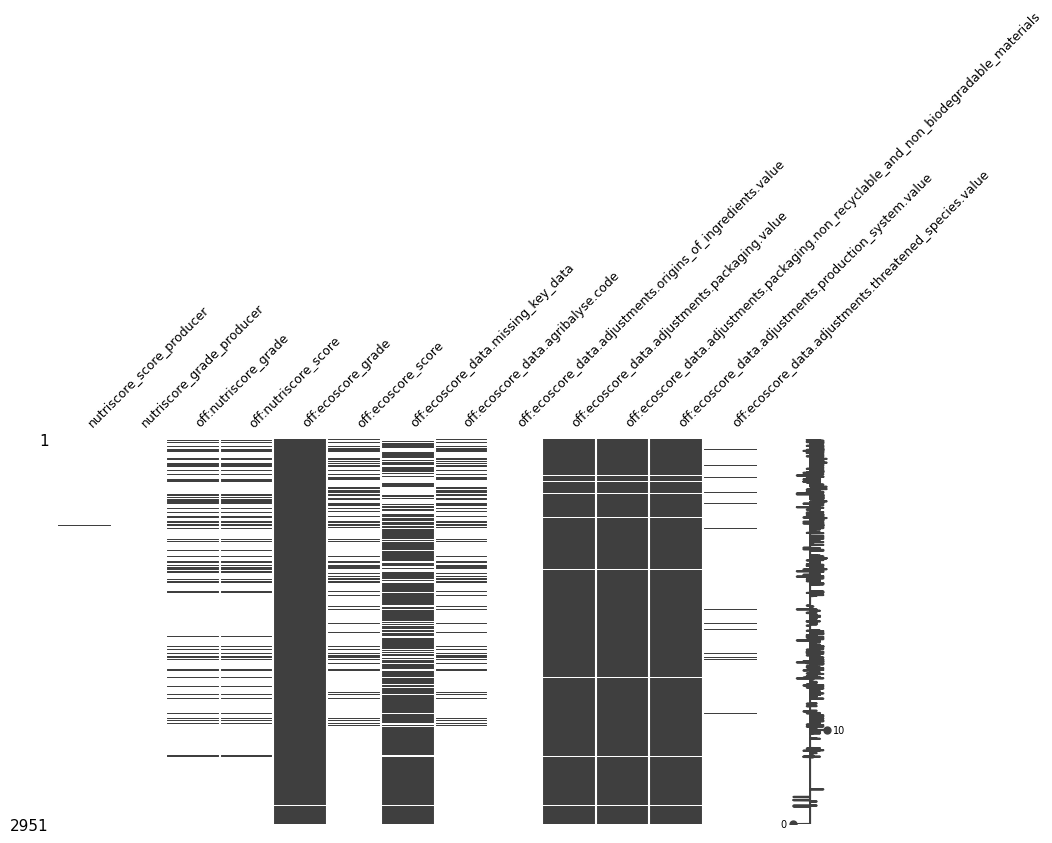

In [32]:
_ = msno.matrix(df=avail_scores, figsize=(10,5), fontsize=9)

## 3.1. Filtering the data according to the idea

In [33]:
# Overview of what information it contains.
print(tabulate(cleaning_df.head(5), headers='keys', tablefmt='github'))

|    |          code |   producer_version_id | lc   | product_name_en       | quantity   | serving_size   | packaging                               | packaging_tags                                                 | brands                                                | brands_tags                                           |   brand_owner | categories                                                                                                                     | categories_tags                                                                                                                                     | labels                               | labels_tags                              | countries                                                                                                                               | countries_tags                                                                                                                                                

In [34]:
# I initialize a list of columns to remove
drop_cols = []

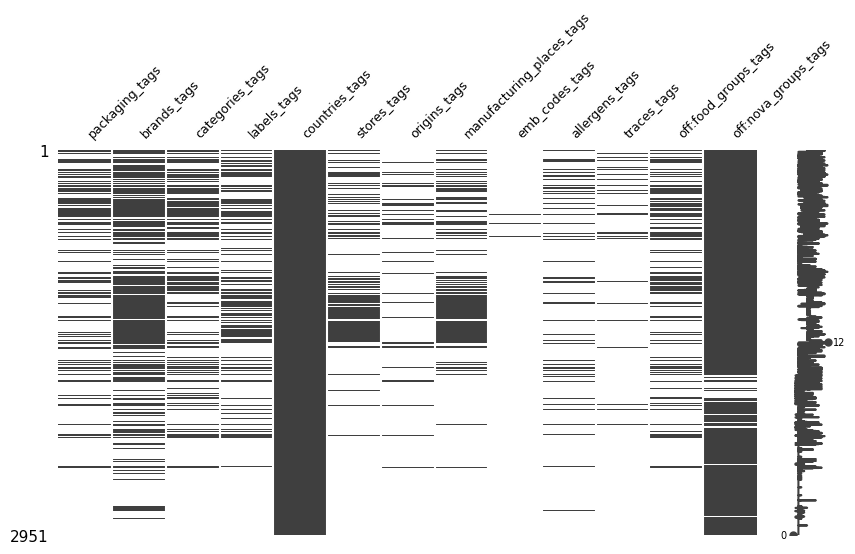

In [58]:
# I'll start by looking at some subsets of the data
subset_df = cleaning_df.filter(regex=('_tags$'))

_ = msno.matrix(df=subset_df, figsize=(10,5), fontsize=9)

In [59]:
# I also save the columns in a list:
removed_list = subset_df.columns.to_list()

In [61]:
# From this list, I remove the columns I want to keep
removed_list.remove('brands_tags')
removed_list.remove('countries_tags')
removed_list.remove('off:nova_groups_tags')

# And I add the remaining columns in the removal list
drop_cols.extend(removed_list)

In [ ]:
# CONTINUE AND REPEAT THE PROCESS BELOW

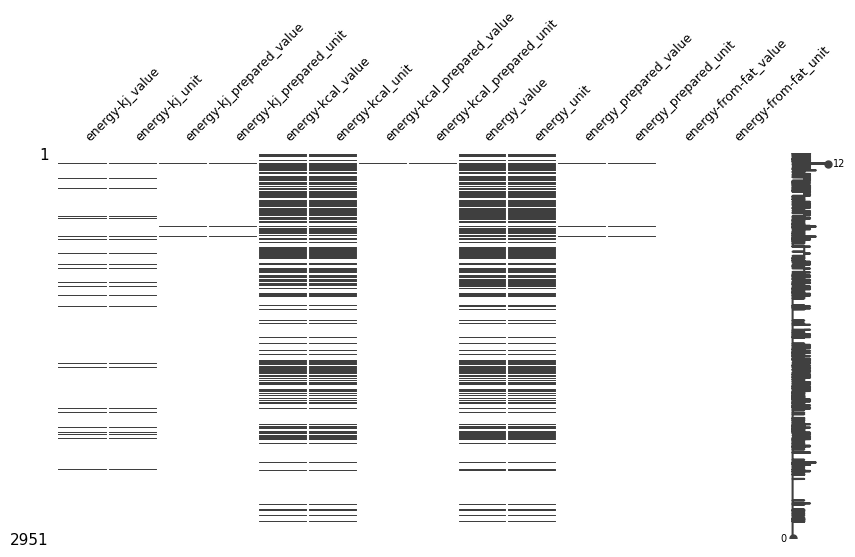

In [37]:
# I repeat the same process for another interesting keyword
subset_df = cleaning_df.filter(regex=('energy'))

_ = msno.matrix(df=subset_df, figsize=(10,5), fontsize=9)

In [38]:
# I add the columns that are not so interesting/too empty
drop_cols.extend(['energy-kj_value', 'energy-kj_unit',
                  'energy-kj_prepared_value', 'energy-kj_prepared_unit',
                  'energy-kcal_prepared_value', 'energy-kcal_prepared_unit',
                  'energy_prepared_value', 'energy_prepared_unit',
                  'energy-from-fat_value', 'energy-from-fat_unit'])

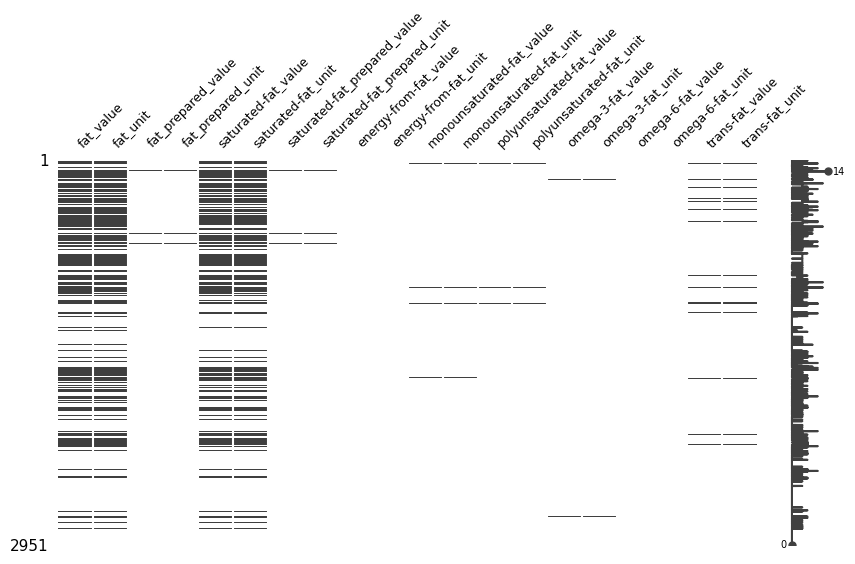

In [39]:
# I repeat the same process for another interesting keyword
subset_df = cleaning_df.filter(regex=('fat_'))

_ = msno.matrix(df=subset_df, figsize=(10,5), fontsize=9)

In [40]:
# I add the columns that are not so interesting/too empty
drop_cols.extend(['fat_prepared_value', 'fat_prepared_unit',
                  'saturated-fat_prepared_value', 'saturated-fat_prepared_unit',
                  'monounsaturated-fat_value', 'monounsaturated-fat_unit',
                  'polyunsaturated-fat_value', 'polyunsaturated-fat_unit',
                  'omega-3-fat_value', 'omega-3-fat_unit', 'omega-6-fat_value',
                  'omega-6-fat_unit', 'trans-fat_value', 'trans-fat_unit'])

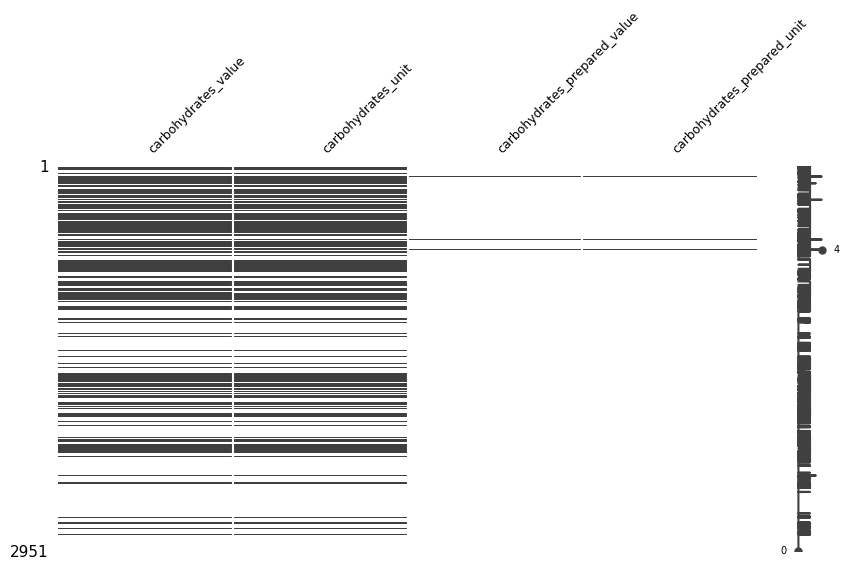

In [41]:
# I repeat the same process for another interesting keyword
subset_df = cleaning_df.filter(regex=('carbohydrates_'))

_ = msno.matrix(df=subset_df, figsize=(10,5), fontsize=9)

In [42]:
# I add the columns that are not so interesting/too empty
drop_cols.extend(['carbohydrates_prepared_value',
                  'carbohydrates_prepared_unit'])

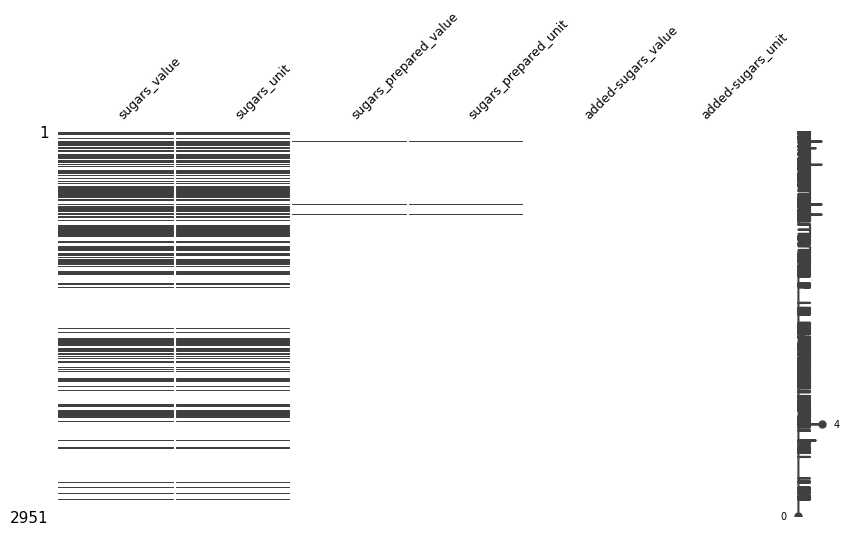

In [43]:
# I repeat the same process for another interesting keyword
subset_df = cleaning_df.filter(regex=('sugars_'))

_ = msno.matrix(df=subset_df, figsize=(10,5), fontsize=9)

In [44]:
# I add the columns that are not so interesting/too empty
drop_cols.extend(['sugars_prepared_value', 'sugars_prepared_unit',
                  'added-sugars_value', 'added-sugars_unit'])

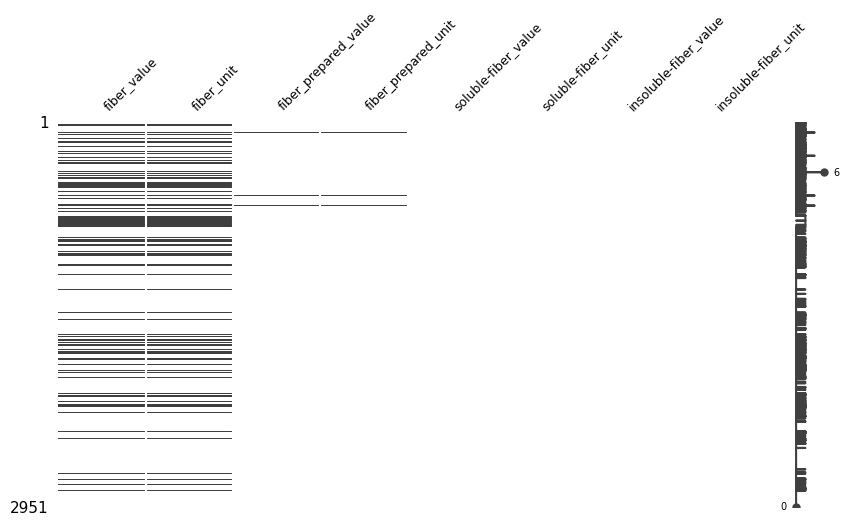

In [45]:
# I repeat the same process for another interesting keyword
subset_df = cleaning_df.filter(regex=('fiber'))

_ = msno.matrix(df=subset_df, figsize=(10,5), fontsize=9)

In [46]:
# I add the columns that are not so interesting/too empty
drop_cols.extend(['fiber_prepared_value', 'fiber_prepared_unit',
                  'soluble-fiber_value', 'soluble-fiber_unit',
                  'insoluble-fiber_value', 'insoluble-fiber_unit'])

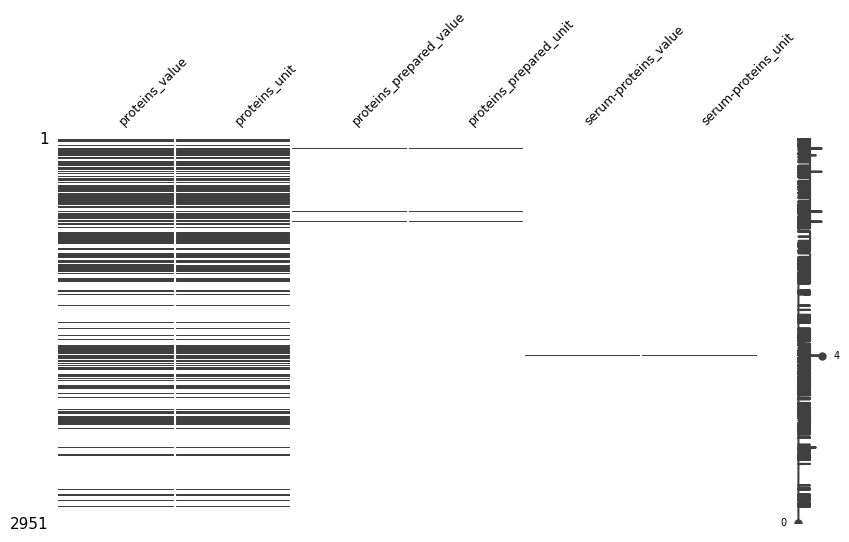

In [47]:
# I repeat the same process for another interesting keyword
subset_df = cleaning_df.filter(regex=('proteins_'))

_ = msno.matrix(df=subset_df, figsize=(10,5), fontsize=9)

In [48]:
# I add the columns that are not so interesting/too empty
drop_cols.extend(['proteins_prepared_value', 'proteins_prepared_unit',
                  'serum-proteins_value', 'serum-proteins_unit'])

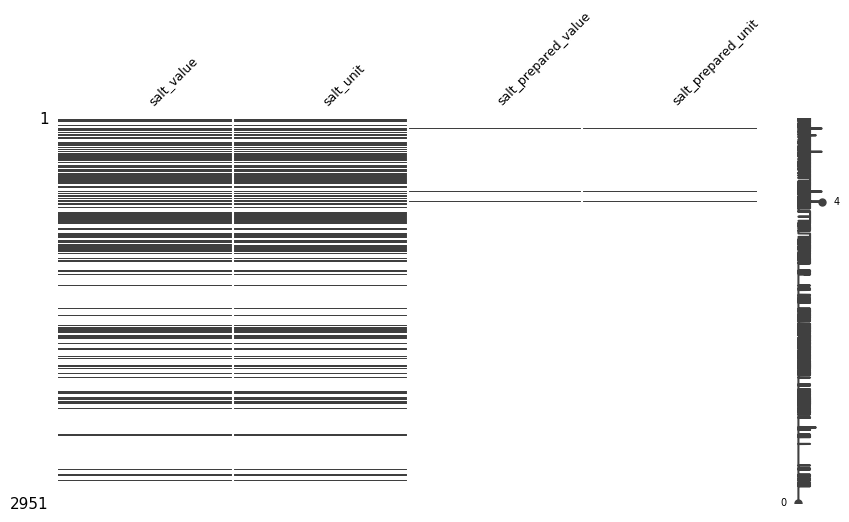

In [49]:
# I repeat the same process for another interesting keyword
subset_df = cleaning_df.filter(regex=('salt_'))

_ = msno.matrix(df=subset_df, figsize=(10,5), fontsize=9)

In [50]:
# I add the columns that are not so interesting/too empty
drop_cols.extend(['salt_prepared_value', 'salt_prepared_unit'])

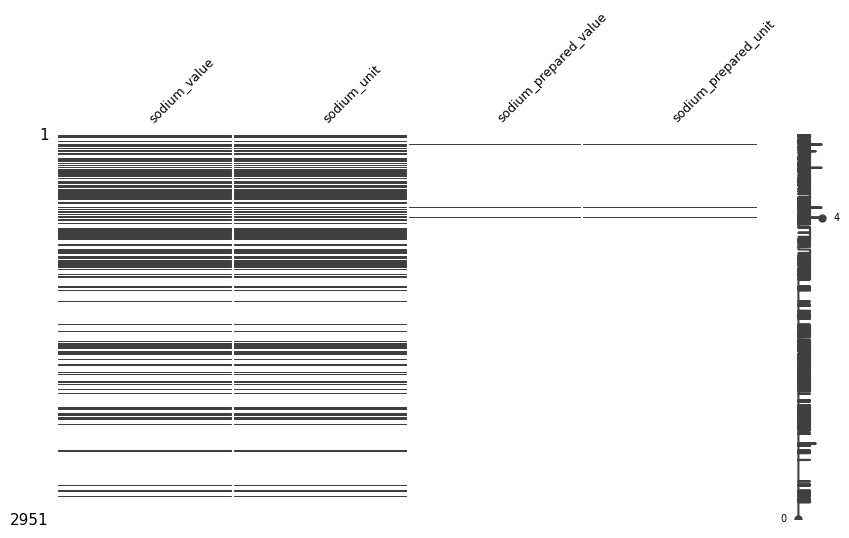

In [51]:
# I repeat the same process for another interesting keyword
subset_df = cleaning_df.filter(regex=('sodium_'))

_ = msno.matrix(df=subset_df, figsize=(10,5), fontsize=9)

In [52]:
# I add the columns that are not so interesting/too empty
drop_cols.extend(['sodium_prepared_value', 'sodium_prepared_unit'])

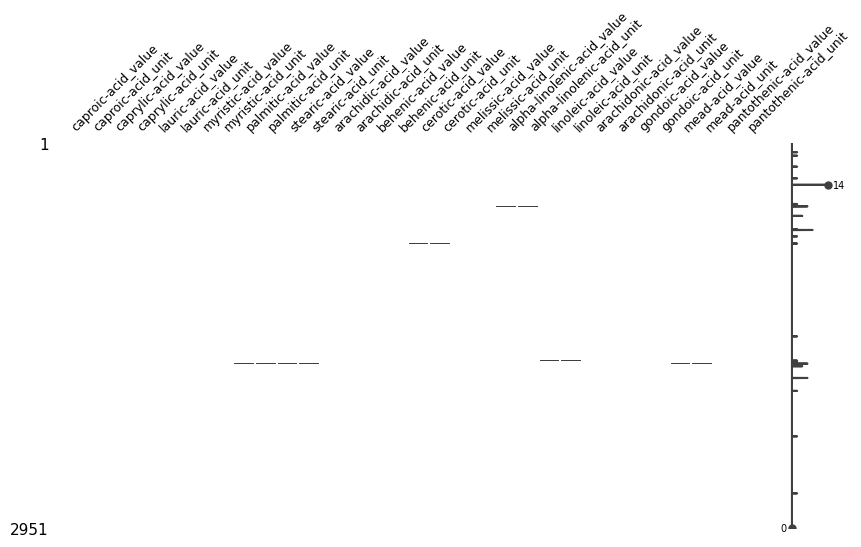

In [53]:
# I repeat the same process for another interesting keyword
subset_df = cleaning_df.filter(regex=('-acid_'))

_ = msno.matrix(df=subset_df, figsize=(10,5), fontsize=9)

In [ ]:
# I add the columns that are not so interesting/too empty
drop_cols.extend(['caproic-acid_value', 'caproic-acid_unit', ''])

In [ ]:

# Check:
# -acid_
# vitamin-
# packaging_
# nutriscore_
# ecoscore_

In [ ]:
cleaning_df[['product_name_en', 'categories_tags']]

,product_name_en,categories_tags
0,NaN,"en:beverages,en:tea-based-beverages,en:still-s..."
1,NaN,"en:canned-foods,en:meals,en:soups,en:canned-me..."
2,Fusilli Pasta,"en:plant-based-foods-and-beverages,en:plant-ba..."
3,Mint Mentos,"en:snacks,en:sweet-snacks,en:confectioneries,e..."
4,Honey roasted cashews,NaN
...,...,...
2946,Anchor 490ml strong beer,NaN
2947,Anchor beer can 490ml,NaN
2948,Baron's strong brew can 49pml,NaN
2949,Guinness stout 500ml,NaN


In [ ]:
test1 = ['product_name_en', 'categories_tags']

In [ ]:
test1.extend(['countries_tags', 'obsolete'])

In [ ]:
cleaning_df[test1]

,product_name_en,categories_tags,countries_tags,obsolete
0,NaN,"en:beverages,en:tea-based-beverages,en:still-s...",en:singapore,0.0
1,NaN,"en:canned-foods,en:meals,en:soups,en:canned-me...","en:germany,en:singapore",0.0
2,Fusilli Pasta,"en:plant-based-foods-and-beverages,en:plant-ba...","en:australia,en:austria,en:belgium,en:bulgaria...",0.0
3,Mint Mentos,"en:snacks,en:sweet-snacks,en:confectioneries,e...","en:australia,en:singapore,en:switzerland",0.0
4,Honey roasted cashews,NaN,en:singapore,0.0
...,...,...,...,...
2946,Anchor 490ml strong beer,NaN,en:singapore,0.0
2947,Anchor beer can 490ml,NaN,en:singapore,0.0
2948,Baron's strong brew can 49pml,NaN,en:singapore,0.0
2949,Guinness stout 500ml,NaN,en:singapore,0.0


In [ ]:
# Column selection based on the name and what it should contain
selected_df = cleaning_df[['product_name_en', 'categories_tags', 'labels_tags',
                           'countries_tags', 'obsolete', 'obsolete_since_date',
                           'allergens_tags', 'traces_tags', 'no_nutrition_data',
                           'nutrition_data_per', 'nutrition_data_prepared_per',
                           'energy-kcal_value', 'energy-kcal_unit',
                           'fat_value', 'fat_unit',
                           'fat_prepared_value', 'fat_prepared_unit',
                           'saturated-fat_value', 'saturated-fat_unit',
                           'saturated-fat_prepared_value',
                           'saturated-fat_prepared_unit', 'carbohydrates_value',
                           'carbohydrates_unit', 'sugars_value', 'sugars_unit',
                           'fiber_value', 'fiber_unit', 'proteins_value',
                           'proteins_unit', 'salt_value', 'salt_unit',
                           'sodium_value', 'sodium_unit', 'alcohol_value',
                           'alcohol_unit', 'energy_value', 'energy_unit',
                           'energy-from-fat_value', 'energy-from-fat_unit',
                           'monounsaturated-fat_value',
                           'monounsaturated-fat_unit',
                           'polyunsaturated-fat_value',
                           'polyunsaturated-fat_unit', 'omega-3-fat_value',
                           'omega-3-fat_unit', 'omega-6-fat_value',
                           'omega-6-fat_unit', 'trans-fat_value', 'trans-fat_unit'


                           'nutriscore_score', 'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
                'energy-kj_100g', 'energy-kcal_100g', 'energy_100g', 'energy-from-fat_100g', 'fat_100g',
                'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g',
                'omega-6-fat_100g', 'omega-9-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
                'sugars_100g', 'starch_100g', 'fiber_100g', 'proteins_100g', 'nucleotides_100g', 'salt_100g',
                'sodium_100g', 'alcohol_100g', 'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-dried_100g',
                'fruits-vegetables-nuts-estimate_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g',
                'glycemic-index_100g']]